# P6 - Notebook 1 : Analyse Exploratoire des Données (EDA)

## 1. Imports et Chargement des Données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

# Charger le fichier de données brutes
df = pd.read_csv('Data/flipkart_com-ecommerce_sample_1050.csv')

## 2. Vue d'Ensemble des Données

Informations générales sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-nul

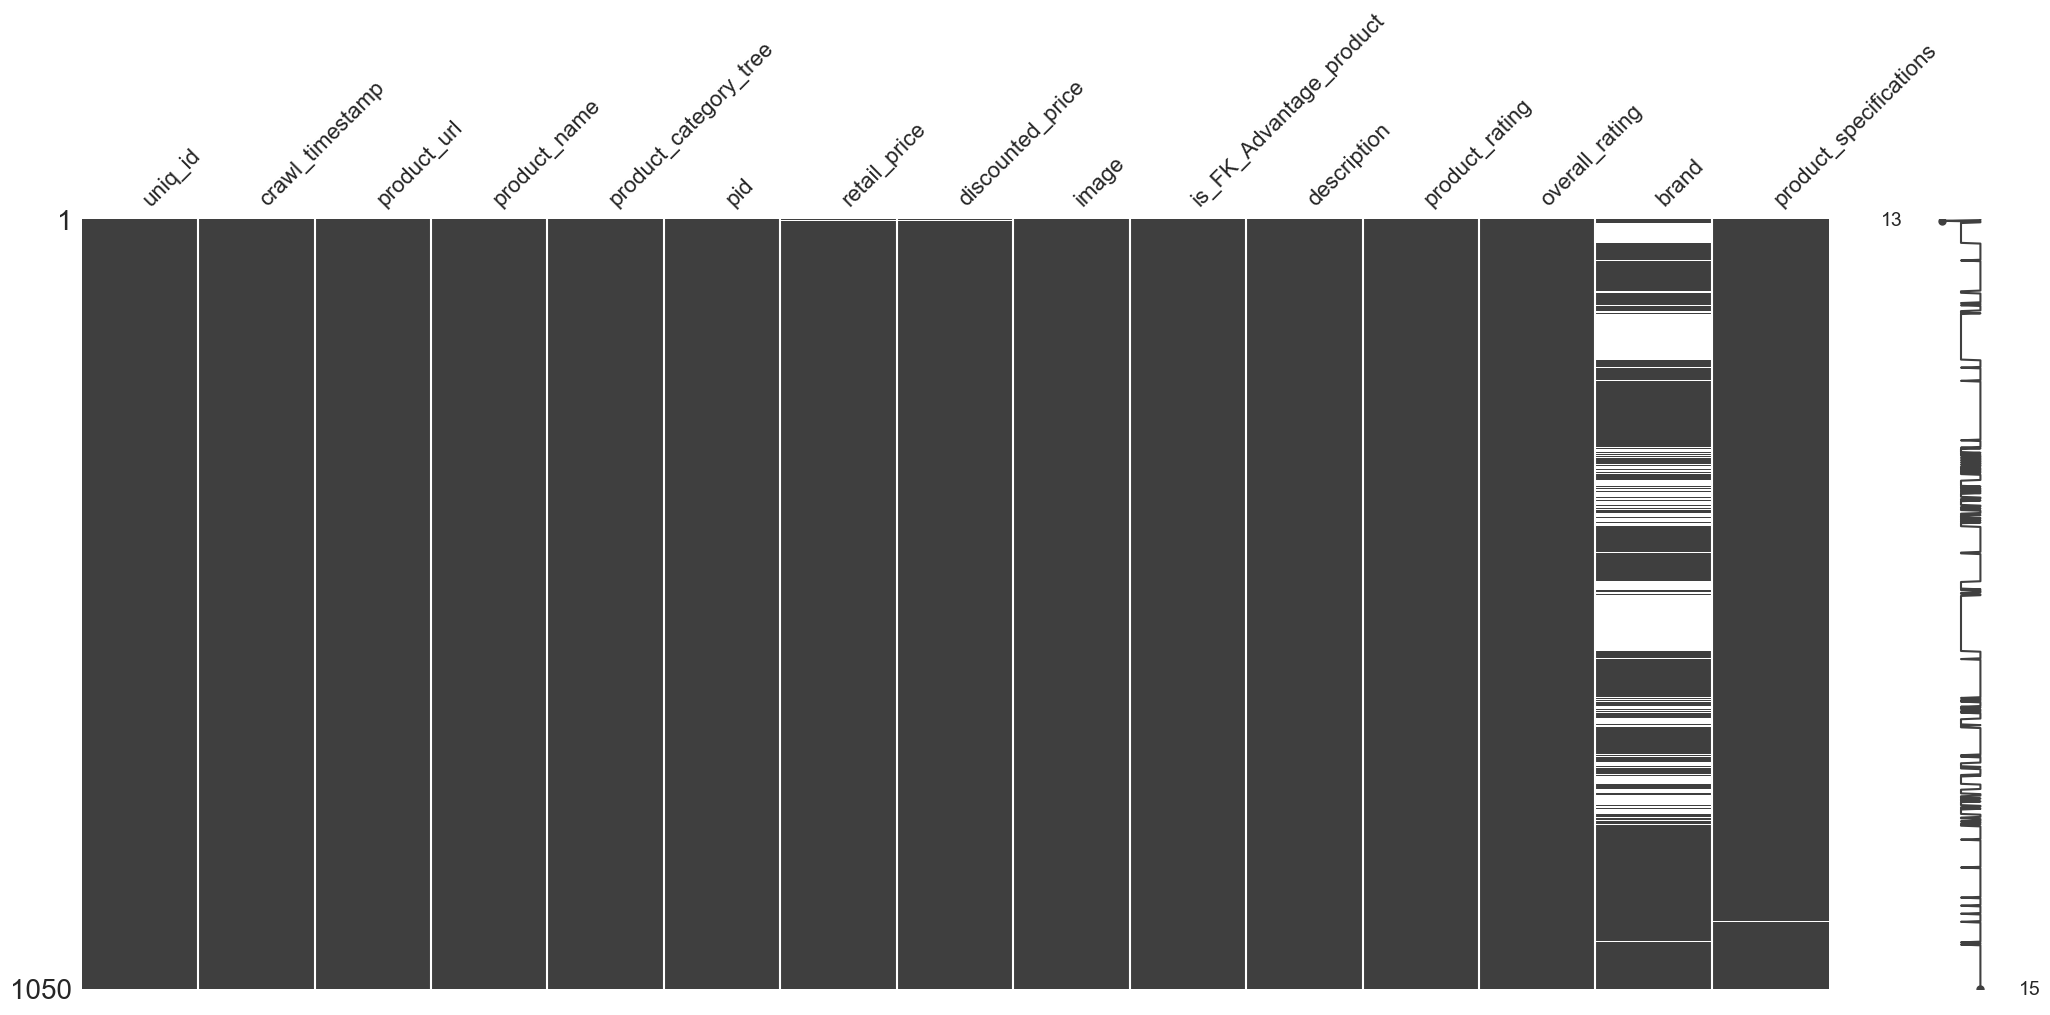

In [2]:
print("Informations générales sur le DataFrame :")
df.info()

print("\n\nPremières lignes du DataFrame :")
df.head()

# Visualisation des valeurs manquantes
print("\n\nVisualisation des valeurs manquantes :")
msno.matrix(df)
plt.show()

## 3. Nettoyage et Création des Variables Cibles et Features

In [3]:
# L'analyse exploratoire a montré que les colonnes 'description', 'product_category_tree' et 'image'
# sont les plus pertinentes pour notre mission.

# **3.1 Extraction de la catégorie principale (notre variable cible 'y')**

def get_main_category(category_tree_str):
    """
    Extrait la catégorie principale de la colonne 'product_category_tree'.
    Cette fonction nettoie la chaîne de caractères pour être robuste.
    """
    try:
        cleaned_str = str(category_tree_str).strip().strip('[]"\' ')
        main_cat = cleaned_str.split('>>')[0].strip()
        return main_cat
    except Exception:
        return None

df['main_category'] = df['product_category_tree'].apply(get_main_category)


# **3.2 Création du chemin d'accès pour chaque image**

def get_image_filename(image_list_str):
    """
    Extrait le nom du fichier de la première URL listée dans la colonne 'image'.
    """
    try:
        cleaned_str = str(image_list_str).strip().strip('[]"\' ')
        first_item = cleaned_str.split(',')[0].strip().strip('"\' ')
        filename = first_item.split('/')[-1]
        return filename
    except Exception:
        return None

df['image_filename'] = df['image'].apply(get_image_filename)

image_directory = "Data/Images/"
df['image_path'] = df['image_filename'].apply(lambda x: os.path.join(image_directory, x) if pd.notna(x) else None)

## 4. Analyse de la Variable Cible



Distribution des catégories principales :
main_category
Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: count, dtype: int64


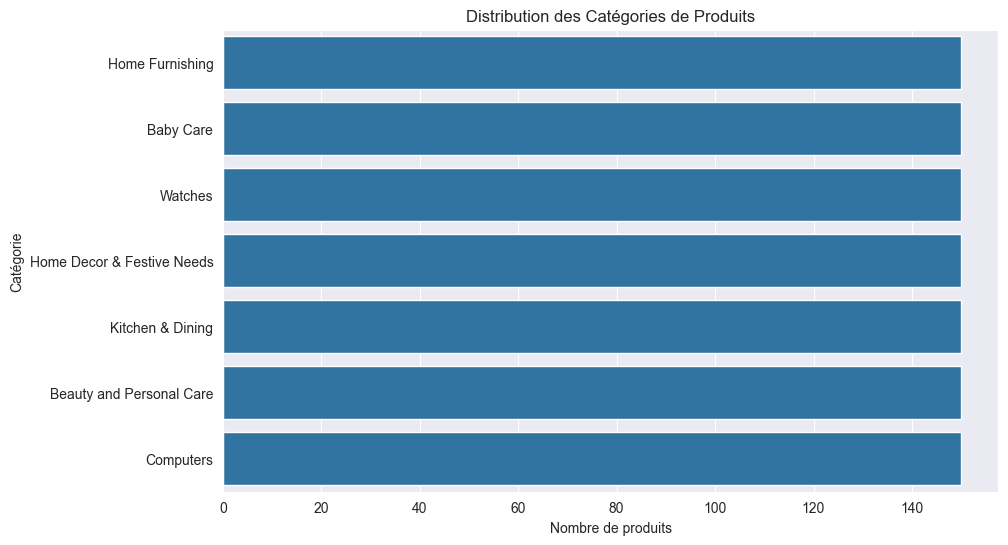

In [4]:
print("\n\nDistribution des catégories principales :")
print(df['main_category'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df['main_category'], order=df['main_category'].value_counts().index)
plt.title('Distribution des Catégories de Produits')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie')
plt.show()

## 5. Création et Sauvegarde du DataFrame Nettoyé

In [5]:
# On sélectionne les colonnes utiles pour la suite et on supprime les lignes avec des valeurs manquantes.
df_cleaned = df[['description', 'main_category', 'image_path']].dropna()

print(f"\n\nDimensions du DataFrame final nettoyé : {df_cleaned.shape}")
print("Extrait du DataFrame nettoyé :")
print(df_cleaned.head())

# Sauvegarde pour les prochains notebooks
df_cleaned.to_csv('Data/data_cleaned.csv', index=False)

print("\n\nDataFrame nettoyé et sauvegardé avec succès dans 'Data/data_cleaned.csv'")



Dimensions du DataFrame final nettoyé : (1050, 3)
Extrait du DataFrame nettoyé :
                                         description    main_category  \
0  Key Features of Elegance Polyester Multicolor ...  Home Furnishing   
1  Specifications of Sathiyas Cotton Bath Towel (...        Baby Care   
2  Key Features of Eurospa Cotton Terry Face Towe...        Baby Care   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  Home Furnishing   
4  Key Features of Jaipur Print Cotton Floral Kin...  Home Furnishing   

                                         image_path  
0  Data/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg  
1  Data/Images/7b72c92c2f6c40268628ec5f14c6d590.jpg  
2  Data/Images/64d5d4a258243731dc7bbb1eef49ad74.jpg  
3  Data/Images/d4684dcdc759dd9cdf41504698d737d8.jpg  
4  Data/Images/6325b6870c54cd47be6ebfbffa620ec7.jpg  


DataFrame nettoyé et sauvegardé avec succès dans 'Data/data_cleaned.csv'
